In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
import numpy as np
import os 
my_path = os.path.abspath('/home/juan/Desktop/3level_img/')


In [3]:
class variables():
    def __init__(self):
         #eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        self.w20 = self.w10*self.w2w1
        #carnot efficiency
        self.n_c  =np.arange(1e-6,1,0.02)
        #temperatures
        self.b_l  = 1/np.array([150,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
       #energy variables
        self.lw = np.linspace(0,np.sqrt(self.w2w1),100)
        self.e_20 = self.w10*((1+self.w2w1 )/2 + np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        self.e_10 = self.w10*((1+self.w2w1 )/2 - np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
       #lindblad constants
        self.g_l10  = 100
        self.g_h10 =  self.g_l10
        self.g_h20  = self.g_l10*5
        self.g_l20 = self.g_h20
       
        #cosine data
        self.c    = (self.w2w1 -1 )/(2*np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2 ))
        #power variables
    def g1(self):
        return 1/2*(self.g_l10*(1+self.c) + self.g_h10*(1-self.c))
    def g2(self):
        return 1/2*(self.g_l20*(1-self.c) + self.g_h20*(1+self.c)) 
    def g1m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l10*(1+self.c)*np.exp(-self.b_l*self.e_10)\
                        + self.g_h10*(1-self.c)*np.exp(-self.b_h[value]*self.e_10)))
        return result
    def g2m(self):
        result=[]
        for value in range(len(self.b_h)):
            result.append(1/2*(self.g_l20*(1-self.c)*np.exp(-self.b_l*self.e_20) \
                        + self.g_h20*(1+self.c)*np.exp(-self.b_h[value]*self.e_20)))
        return result

    def omega(self):
        return ((self.e_20-self.e_10)**2 + ( (self.g1()+self.g2())/2)**2)\
                /(self.w20)

    def G(self):
        return  1/2*(self.g1()+self.g2())*(1 + (1/(self.e_20-self.e_10)**2)\
                *(1/2*(self.g1()+self.g2()))**2)

        
 
            
            
              
 #Initialize the object var       
var = variables()

a =var.g2m()/var.g2()- var.g1m()/var.g1()


In [4]:
       
 def POWER(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( (1/2*(e_20-e_10)*(1-c**2)*omega\
                      *( (g2m[value]/g2) - (g1m[value]/g1)))\
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result




In [5]:
def R00(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g2m = var.g2m()
    g1m = var.g1m()
    g2 = var.g2()
    g1 = var.g1()
    omega = var.omega()
    w21 = var.w20- var.w10
    result =[]
    for value in range(len(var.b_h)):
        result.append( ( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) +\
                ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) ) \
                /( (1/2+(g2m[value]/g2))\
               *( ((1-c**2)*omega)/g1\
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)))\
               +(1/2+(g1m[value]/g1))\
               * ( ((1-c**2)*omega)/g2 \
               +(w21/((e_20-e_10)**2))*(1/2*(g1+g2)) )\
                ))
    return result



    

In [6]:
def P0(var):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    b_h    = var.b_h
    b_l    = var.b_l
    result = []
    for value in range(len(var.b_h)):
        result.append( e_10*g_h10*G_l10*((1-c)/2)*(np.exp(-b_h[value]*e_10)-np.exp(-b_l*e_10))
                      +e_20*g_h20*G_l20*((1+c)/2)*(np.exp(-b_h[value]*e_20)-np.exp(-b_l*e_20) ))
    return result

    

In [7]:
def Ql(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    return ( (e_20/(e_20 -e_10))*G_l20 -(e_10/(e_20 -e_10))*G_l10 )*p -qd

def Qh(var,p,qd):
    e_20 = var.e_20
    e_10 = var.e_10
    c= var.c
    g_l10  =  var.g_l10
    g_l20  =  var.g_l20 
    g_h20  =  var.g_h20  
    g_h10  =  var.g_h10 
    G_l10  =  var.g_l10/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_l20  =  (var.g_l20*((1-var.c)/(1+var.c)) )/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    G_h10  =  (var.g_h10*((1-var.c)/(1+var.c)) )/(var.g_l10+ var.g_h10*((1-var.c)/(1+var.c))) 
    G_h20  =  var.g_h20/(var.g_h20+ var.g_l20*((1-var.c)/(1+var.c))) 
    return ( (e_20/(e_20 -e_10))*G_h20 -(e_10/(e_20 -e_10))*G_h10 )*p +qd

def EFF(p,q):
    return p/q
    

In [8]:
P   = POWER(var)
R   = np.array(R00(var))
P_0 = np.array(P0(var))
Q_d = R*P_0
Q_l = Ql(var,P,Q_d)
Q_h = Qh(var,P,Q_d)
n   = EFF(P,Q_h)


<ipython-input-7-96c2dd8ae289>:30: RuntimeWarning: invalid value encountered in true_divide
  return p/q


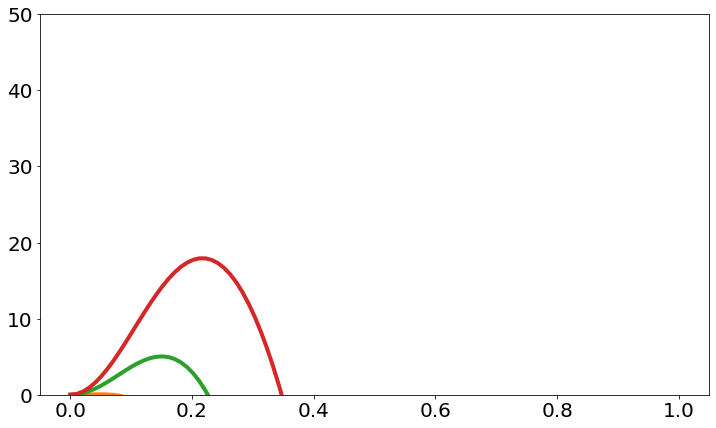

In [18]:
for i in range(10,50,10):
    plt.plot(var.lw/max(var.lw),P[i],linewidth=4)
    plt.ylim(-0,50)

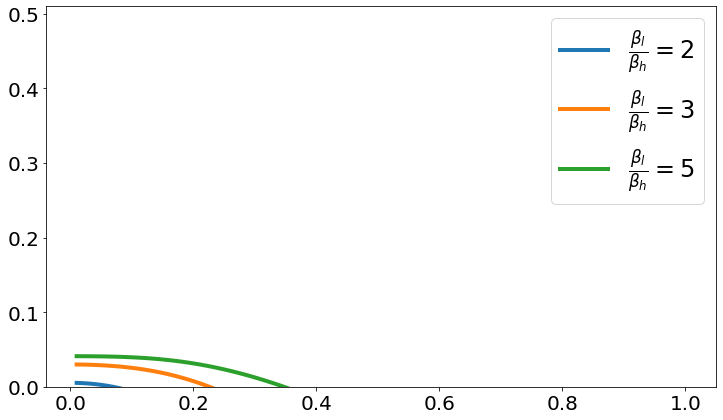

In [9]:
for i in range(20,50,10):
    plt.plot(var.lw/max(var.lw),n[i],linewidth=4,\
            label=r'$\frac{\beta_l}{\beta_h} = %.f$'\
             %(var.b_l/var.b_h[i]) )
    plt.ylim(0,0.51)
    #plt.xlim(0,1)
    plt.legend(fontsize=24)

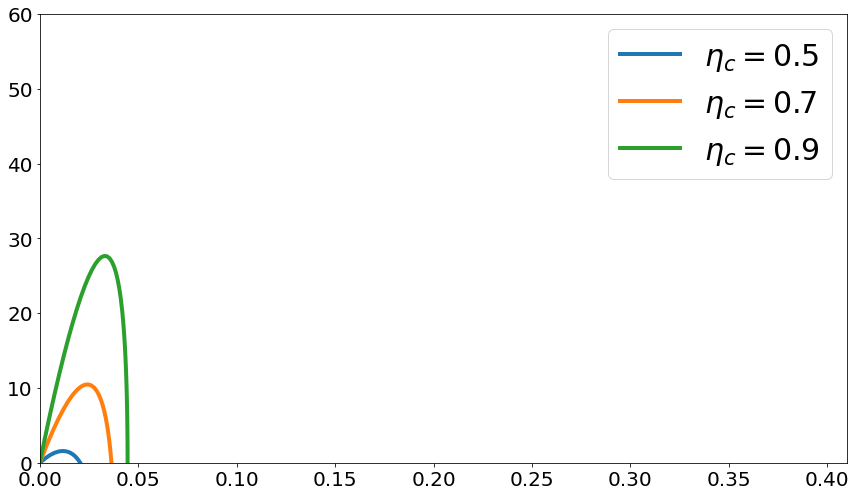

In [28]:

for i in range(25,50,10):
    plt.plot(n[i], P[i],label=r'$ \eta_c =%.1f$'%(var.n_c[i]),linewidth=4)
    plt.ylim(0,60)
    plt.xlim(0,.41)
    plt.legend(fontsize=30)
    plt.tight_layout()

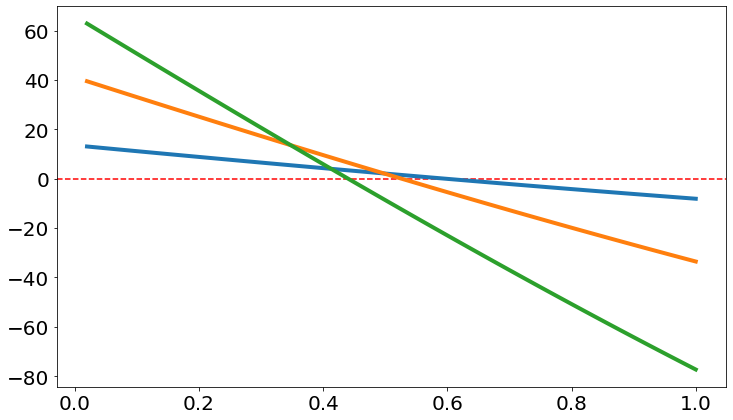

In [14]:
a =np.transpose(P)
b = np.transpose(Q_h)
c = np.transpose(Q_l)
d = np.transpose(Q_d)
e = np.transpose(n)
plt.axhline(y=0, color='r', linestyle='--')
for i in range(10,40,10):
    plt.plot(var.b_h/var.b_l,a[:][i], label= r'$\Lambda =%.1f$'%(var.lw[i]),linewidth=4)
    
   
    


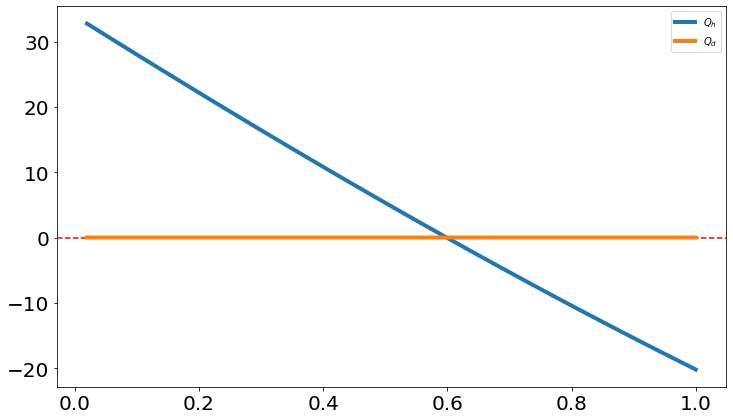

In [308]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,b[:][i], label= r'$Q_h $',linewidth=4)
plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.legend()


(0.0, 1.02)

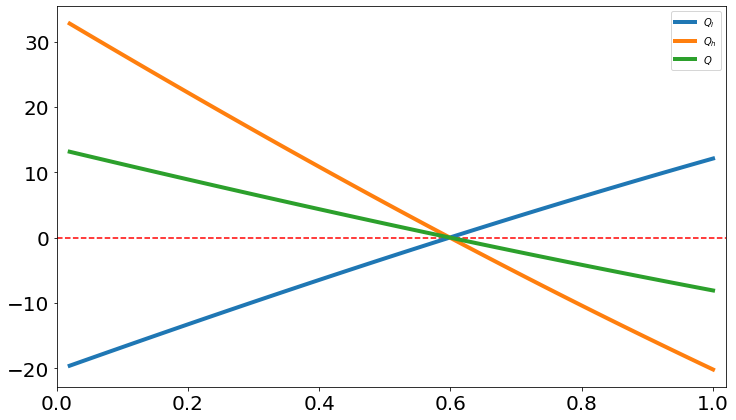

In [304]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,c[:][i], label= r'$Q_l $',linewidth=4)
#plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.plot(var.b_h/var.b_l,b[:][i], label= r'$Q_h $',linewidth=4)
plt.plot(var.b_h/var.b_l,c[:][i]+b[:][i], label= r'$ Q$',linewidth=4)
plt.legend()
plt.xlim(0.,1.02)



(0.0, 1.02)

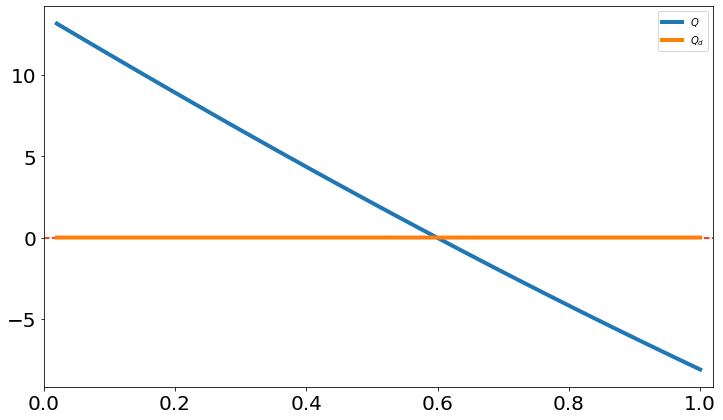

In [309]:
i =10
plt.axhline(y=0, color='r', linestyle='--')
plt.plot(var.b_h/var.b_l,c[:][i]+b[:][i], label= r'$ Q$',linewidth=4)
plt.plot(var.b_h/var.b_l,d[:][i], label= r'$ Q_d$',linewidth=4)
plt.legend()
plt.xlim(0.,1.02)


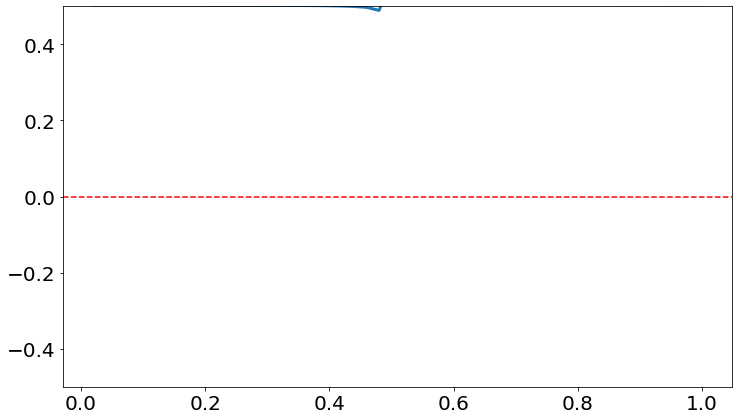

In [295]:
plt.axhline(y=0, color='r', linestyle='--')
for i in range(25,50,10):
    plt.plot(var.b_h/var.b_l,e[:][i], label= r'$\Lambda =%.1f$'%(var.lw[i]),linewidth=3)
    plt.ylim(-.5,.5)
    